## Reinforcement Learning - Upper confidence bound

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [8]:
dataset=pd.read_csv('./../0. DataSets/8.Ads_CTR_Optimisation.csv')

In [9]:
dataset.head(3)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0


## Ver notebook #15 com "explicacao" do business case... Este algoritmo, pelo pouco que percebi, para cada um das alternativas, traca uma normal qq va.. e dps quando tiver para essa distribuicao um valor real ajusta o valor esperado da normal e estreita-a/aumenta a confianca/diminui a variacao.

In [14]:
#Implementing Thompson_sampling
N=10000 #number of rounds/users
d=10 #number of ads
ads_selected=[]

numbers_of_rewards_1=[0]*d
numbers_of_rewards_0=[0]*d

total_reward=0

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta=random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)     
        if random_beta>max_random:
            max_random=random_beta
            ad=i
    ads_selected.append(ad)
    
    reward=dataset.values[n,ad]
    
    if reward==1:
        numbers_of_rewards_1[ad]=numbers_of_rewards_1[ad]+1
    else:
        numbers_of_rewards_0[ad]=numbers_of_rewards_0[ad]+1  
    total_reward=total_reward+reward

In [15]:
total_reward

2608

In [16]:
ads_selected[len(ads_selected)-10:len(ads_selected)]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [17]:
#pelo que percebi, no fim o ad numero 4 e o melhor porque e o smpr escolhido

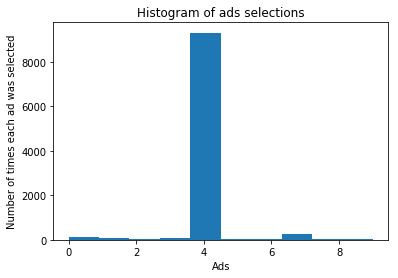

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()